In [1]:
# ----- SETUP CELLS -----

In [1]:
# Welcome to the Python Latency Organizer.

# Run this cell first to setup imports and move to the correct directory.

import sys
import os

# Get the current directory, __file__ does not work in .ipynb so i had to look up how to get the directory of the file online for ipynb.
here = os.getcwd()  # = cd to current directory

# get to src/ folder
src_path = os.path.join(here, "..", "src")  # cd .. then cd src
sys.path.append(src_path) #let python search for modules inside of src folder.

# now we can import modules we made easier. 
from latency.latency_tester import LatencyTester
from utils.io_utils import append_session_row
from analysis.data_analyzer import DataAnalyzer
from analysis.plots import Plots

In [ ]:
# ----- HELPER CELLS -----

In [2]:
# SEED CELL
# Run this cell if you want to automatically run some test sessions and seed the results file with those session summaries.

seed_urls = [
    "https://www.google.com",
    "https://www.youtube.com",
    "https://www.stevens.edu",
    "https://www.wikipedia.org",
    "https://www.github.com",
]

label = "Seed Test"
attempts = 3 

for url in seed_urls:
    print(f"\nRunning seed test for: {url}")

    tester = LatencyTester(url, attempts=attempts, timeout=5, label=label)
    tester.run_tests()

    session = tester.create_session_row()

    print("Seed session in progress..") 

    append_session_row(session)
    print("Session added to results/results.csv")


Running seed test for: https://www.google.com
Seed session in progress..
Session added to results/results.csv

Running seed test for: https://www.youtube.com
Seed session in progress..
Session added to results/results.csv

Running seed test for: https://www.stevens.edu
Seed session in progress..
Session added to results/results.csv

Running seed test for: https://www.wikipedia.org
Seed session in progress..
Session added to results/results.csv

Running seed test for: https://www.github.com
Seed session in progress..
Session added to results/results.csv


In [ ]:
# CLEAR RESULTS CELL
# Run this cell if you want to fully clear the results CSV

## todo: william

In [ ]:
# CLEAR ALL OF A LABEL FROM RESULTS

## todo: william

In [ ]:
# CLEAR ALL OF A URL FROM RESULTS

## todo: william

In [ ]:
# ----- TEST A URL AND ADD IT TO RESULTS CSV -----

In [5]:
# Run this cell to do a test session for a URL and append it to the results file.
print("URL Format: (https://www.***.xyz)\nLabel: Used to differentiate between WIFI, Wired, School\nAttempts: How many times to test connection in session.")
url = input("Enter a URL to test : ").strip()
label = input("Enter a label for this run: ").strip()
attempts = int(input("Enter how many times to test this URL: ").strip())

tester = LatencyTester(url=url, attempts=attempts, timeout=5, label=label)
tester.run_tests()

session = tester.create_session_row()

print(tester)

append_session_row(session)
print("\nSession summary properly appended to results/results.csv")

URL Format: (https://www.***.xyz)
Label: Used to differentiate between WIFI, Wired, School
Attempts: How many times to test connection in session.
Testing Session Complete...
Run started at: 2025-12-02 19:03:00
Label: WIFI
URL: https://www.youtube.com/
Attempts: 20
Successes: 20
Failures: 0
Min (ms): 214.22
Max (ms): 386.06
Avg (ms): 273.23

Session summary properly appended to results/results.csv


In [ ]:
# ----- ANALYSIS CELLS -----

Data from ../results/results.csv

Overall Stats:
total_attempts               180.000000
total_successes              180.000000
total_failures                 0.000000
overall_success_rate         100.000000
overall_avg_latency_ms       243.255769
overall_stddev_latency_ms     84.121486
min_latency_ms                71.370000
max_latency_ms               484.720000

Per-URL Stats:
                           attempts_total  successes_total  failures_total  success_rate  failure_rate  min_latency_ms  max_latency_ms  avg_latency_ms  stddev_latency_ms  latency_range_ms  \
url                                                                                                                                                                                           
https://www.github.com                 30               30               0         100.0           0.0          225.67          341.94      271.141000          12.684924            116.27   
https://www.google.com                 30 

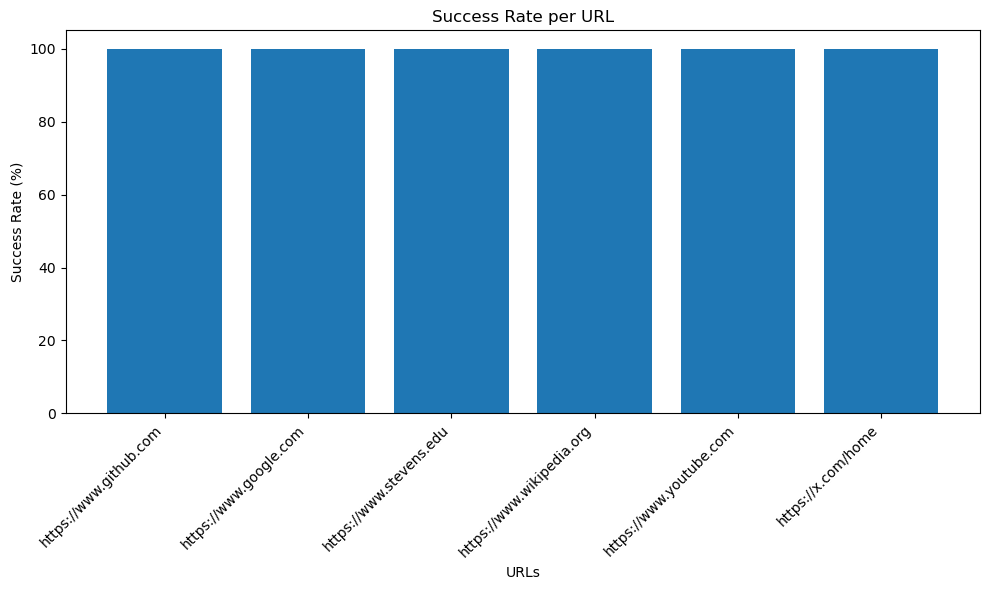

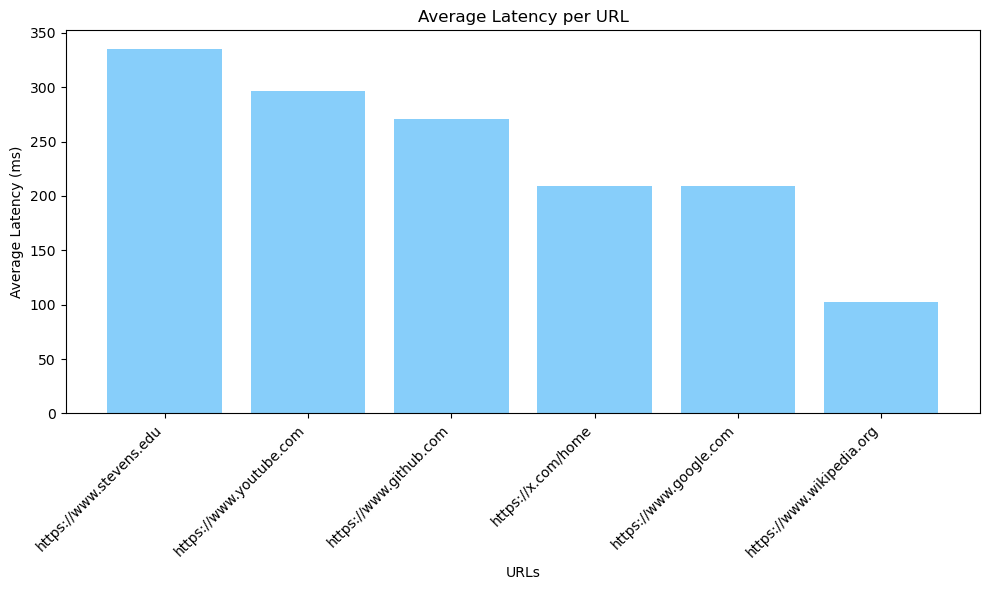

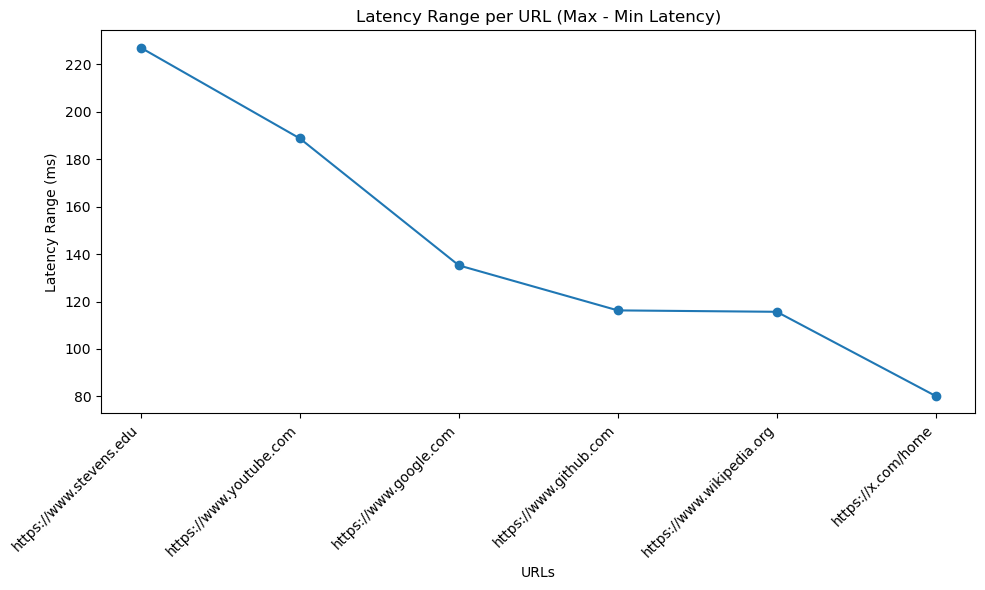

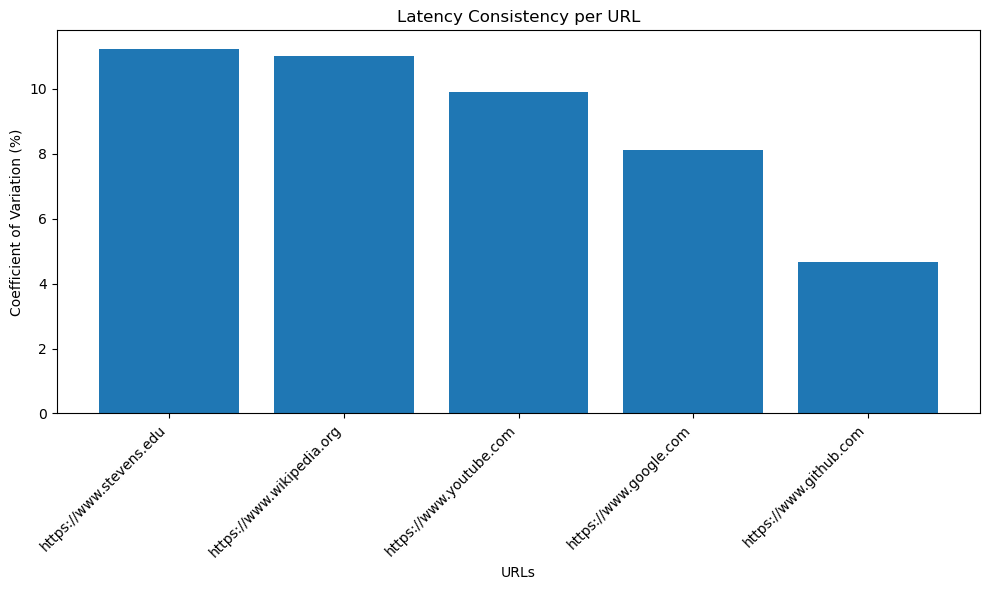

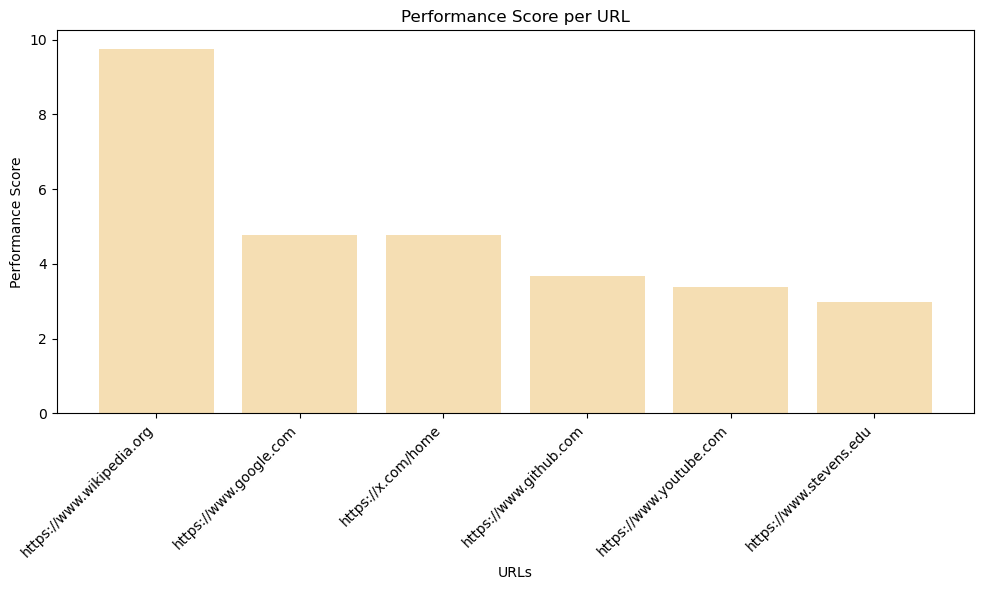

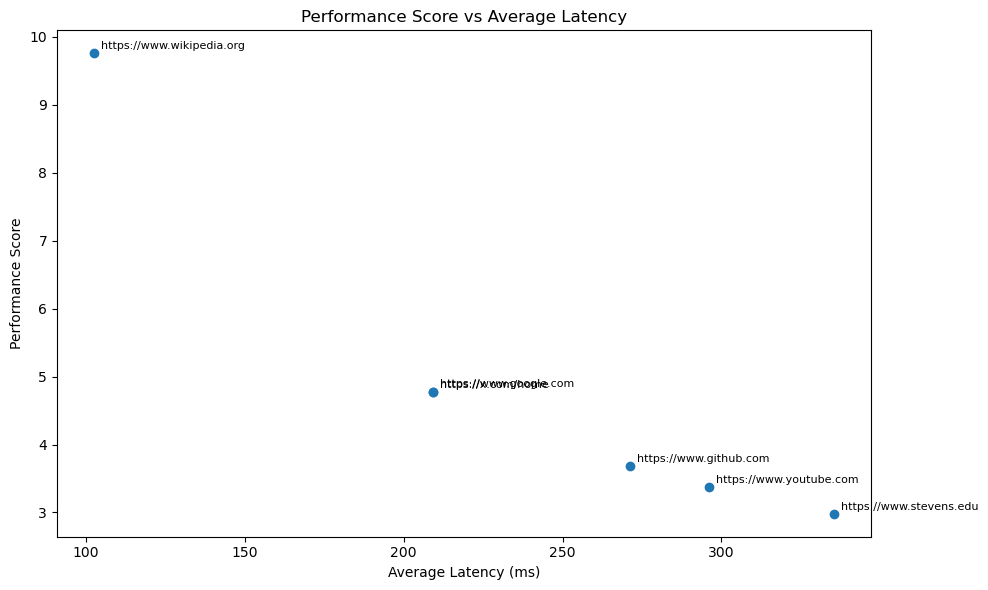

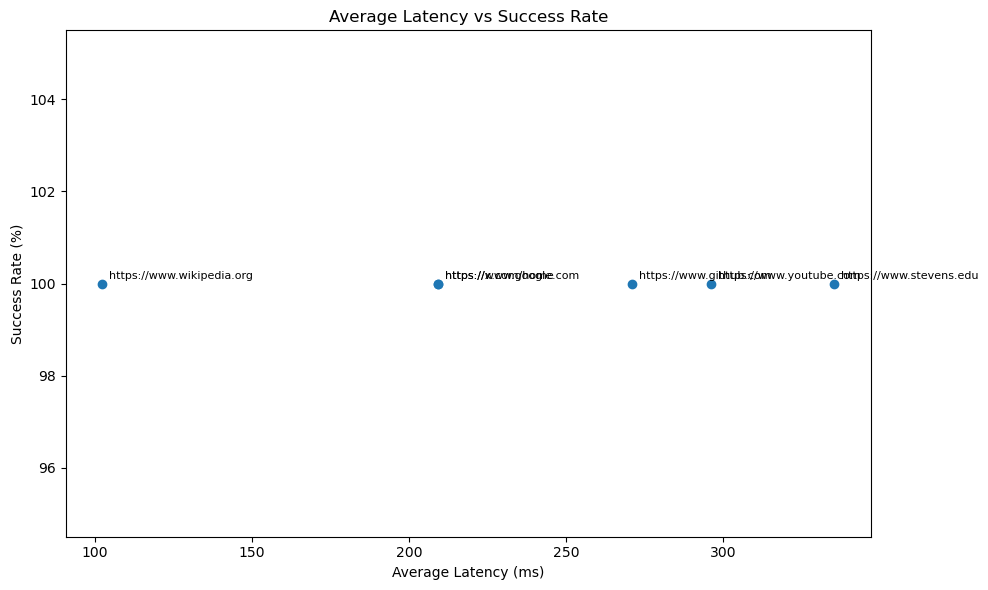

AttributeError: 'Plots' object has no attribute 'plot_correlation_matrix'

In [ ]:
## add a bunch of analysis cells using pandas and matplotlib

# write programs in src/analysis for helpers, then call in here and below cells for stats

# todo: Johnathan 

analyzer = DataAnalyzer("../results/results.csv")
print(analyzer)

url_plots = Plots(analyzer)

url_plots.plot_success_rate()
url_plots.plot_avg_latency()
url_plots.plot_latency_range()
url_plots.plot_cv_latency()
url_plots.plot_performance_score()
url_plots.plot_performance_vs_latency()
url_plots.plot_latency_vs_success_rate()

